In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import missingno as msno
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("UpdatedStudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [5]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [6]:
df.describe()

,math score,reading score,writing score
count,990.000000,985.000000,989.000000
mean,66.208081,69.261929,68.142568
std,15.103724,14.634171,15.199780
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   990 non-null    float64
 6   reading score                985 non-null    float64
 7   writing score                989 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [9]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

In [10]:
df1 = pd.concat([df['math score'],df['reading score'],df['writing score']],axis = 1)

In [11]:
df1

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [12]:
df1.shape

(1000, 3)

In [ ]:
df1 = df
df1 = df1.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'],axis = 1)
df1.isna().sum()

In [18]:
df1_mean = df1
df1_median = df1

In [19]:
df1_median.isna().sum()

math score       10
reading score    15
writing score    11
dtype: int64

<Axes: >

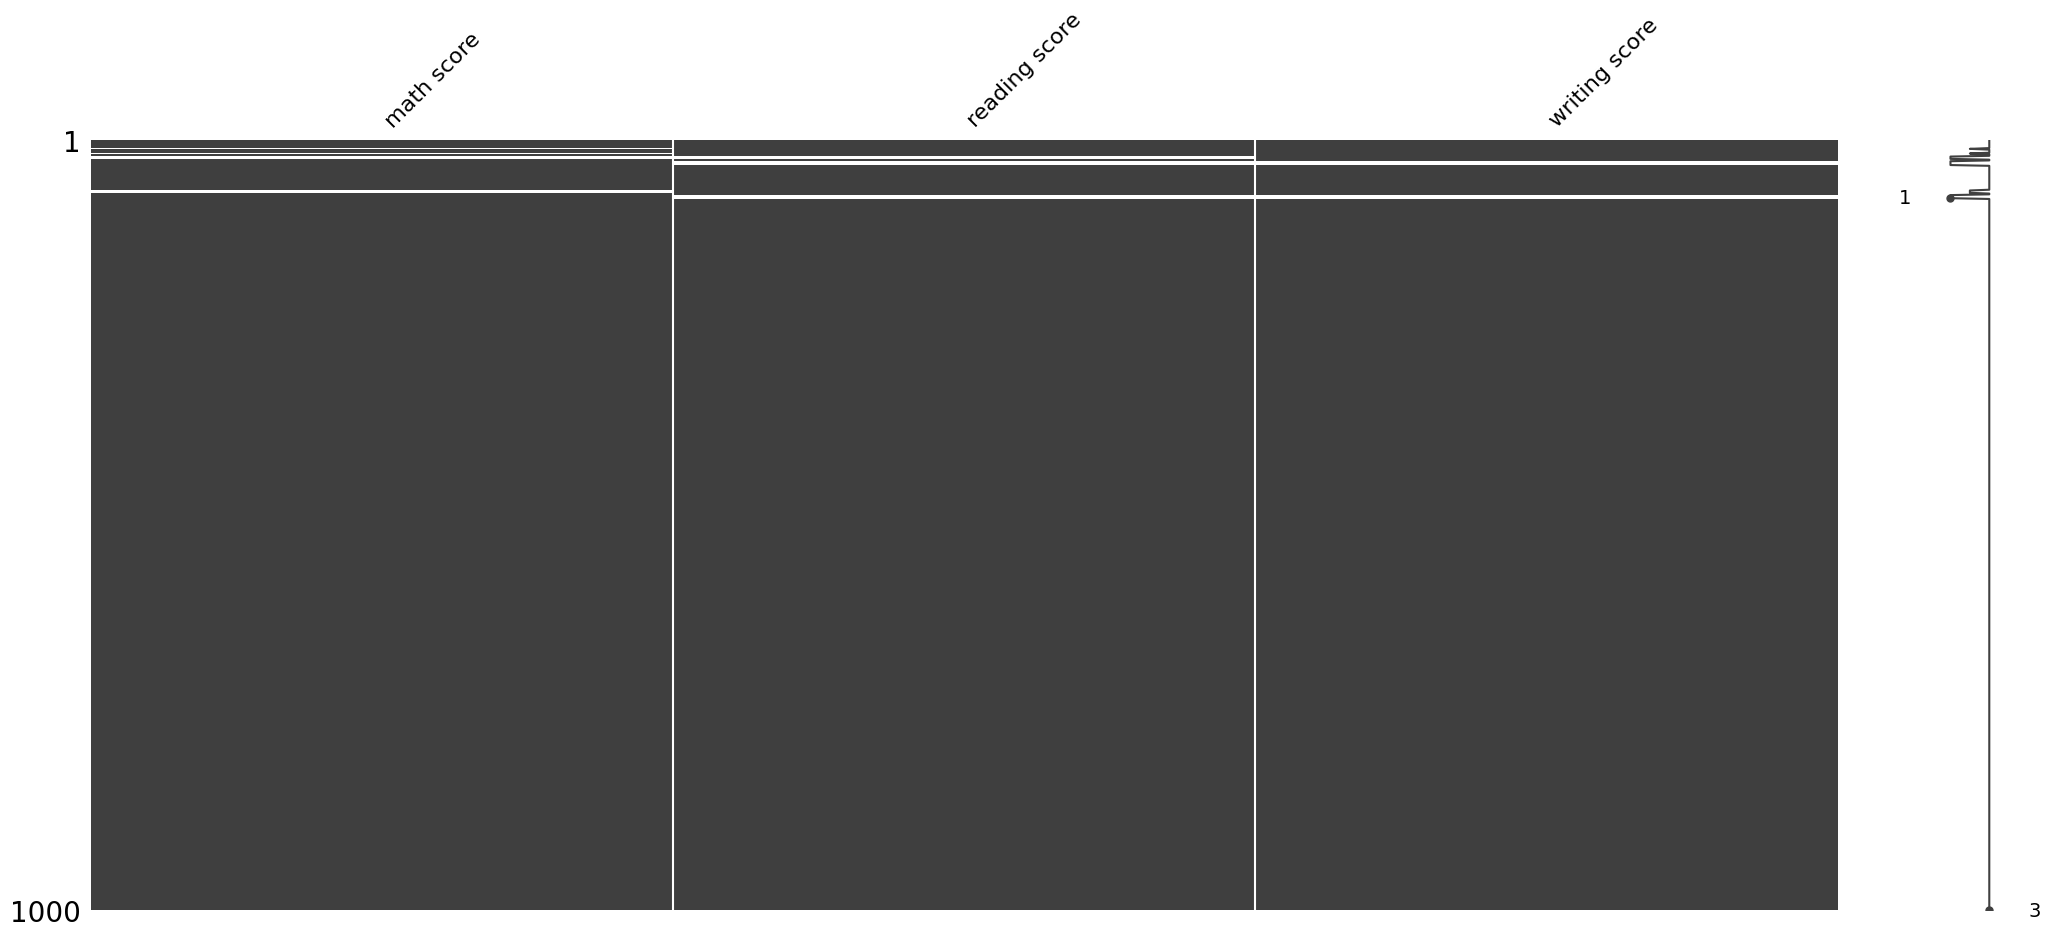

In [16]:
msno.matrix(df1_mean)

<Axes: >

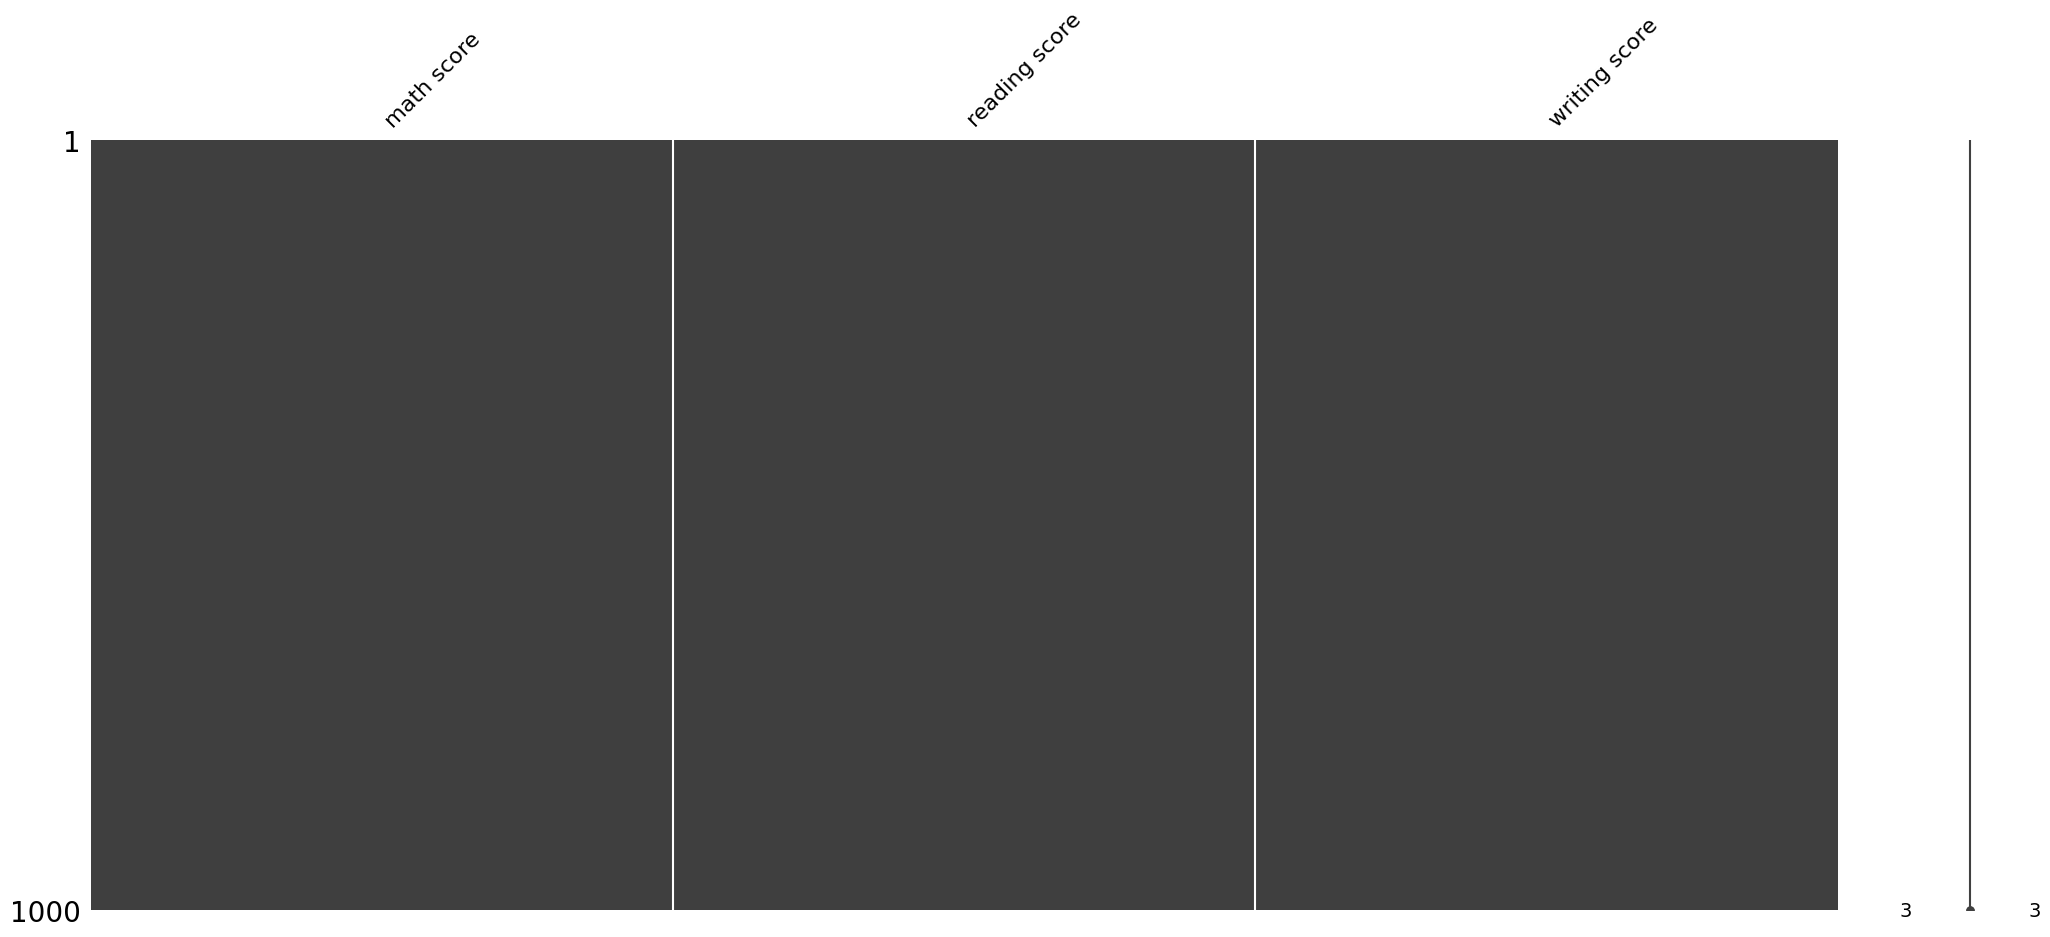

In [20]:
df1_mean['math score'] = df1_mean['math score'].fillna(df1_mean['math score'].mean())
df1_mean['reading score'] = df1_mean['reading score'].fillna(df1_mean['reading score'].mean())
df1_mean['writing score'] = df1_mean['writing score'].fillna(df1_mean['writing score'].mean())
msno.matrix(df1_mean)

<Axes: >

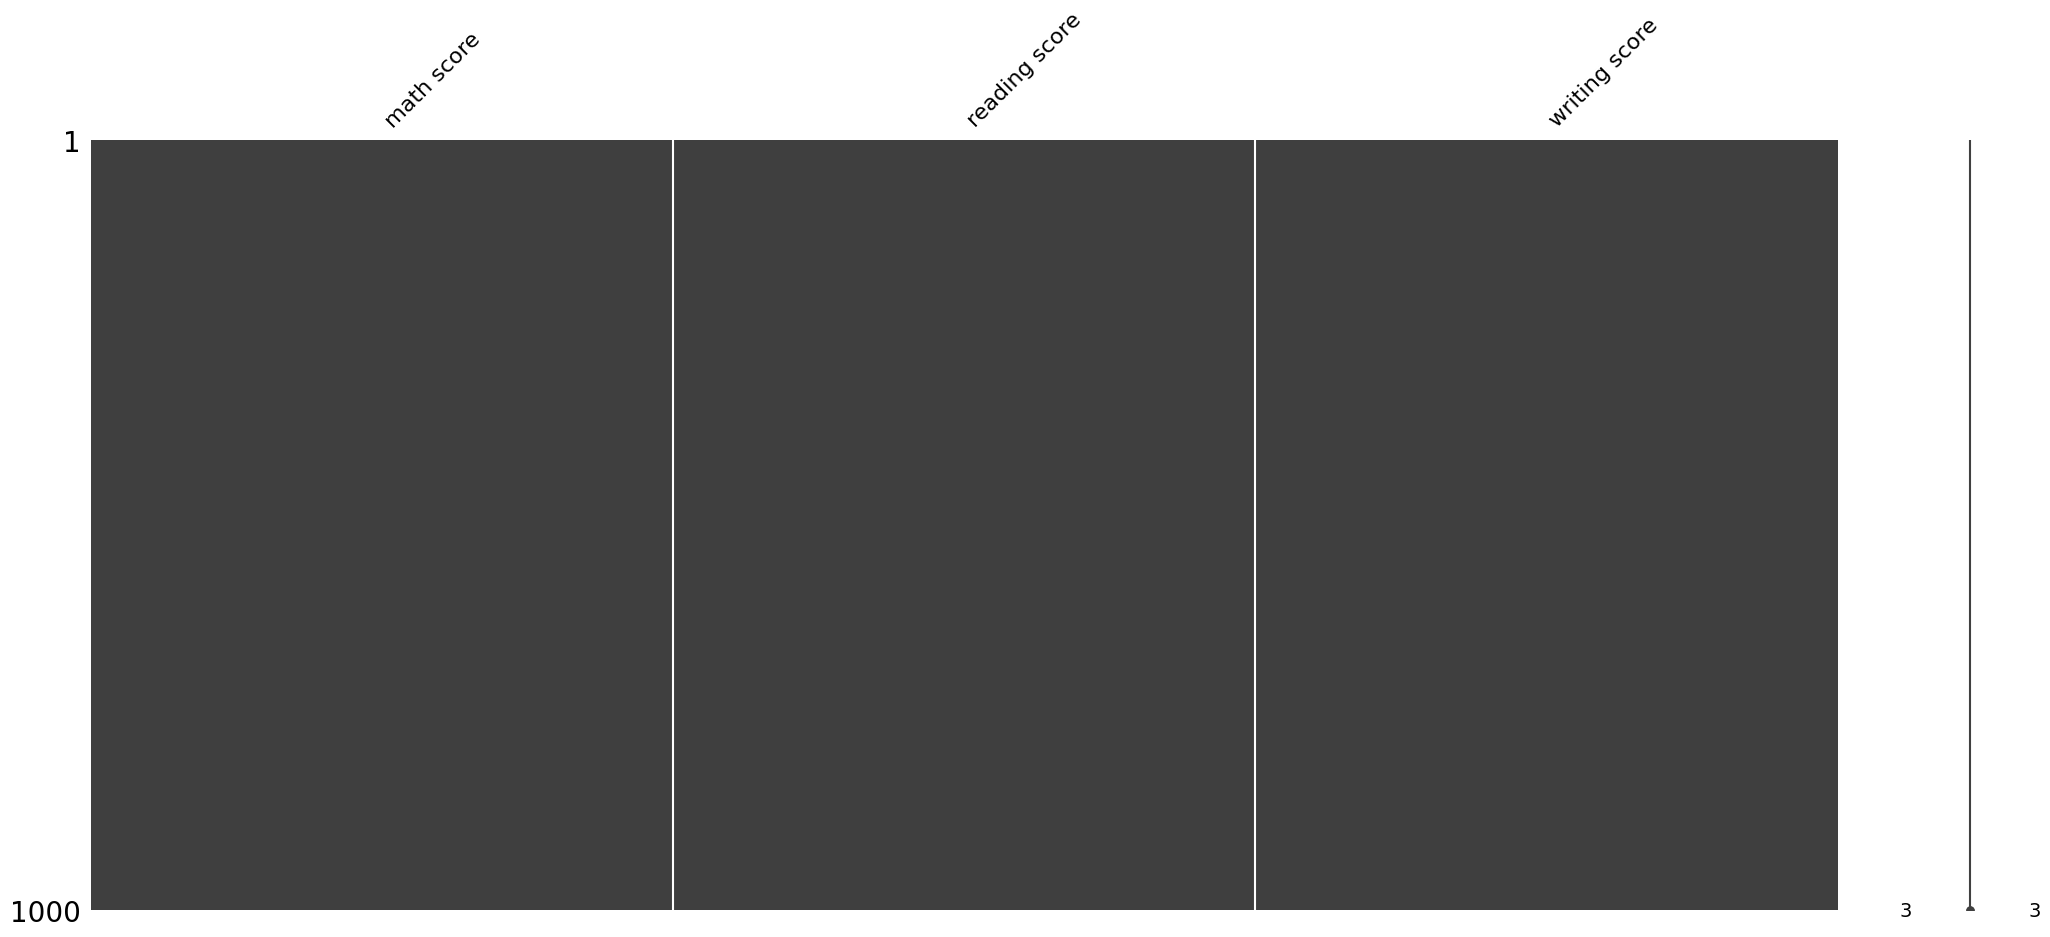

In [21]:
# df1_median = df1
msno.matrix(df1_median)

In [ ]:
msno.matrix(df1_mode)

In [ ]:
msno.matrix(df1_rowdrop)

In [ ]:
msno.matrix(df1_coldrop)

In [ ]:
df1_median = df1
df1_mode = df1
df1_rowdrop = df1
df1_coldrop = df1

In [ ]:
df1_median['math score'] = df1['math score'].fillna(df['math score'].median())
df1_median['reading score'] = df1['reading score'].fillna(df['reading score'].median())
df1_median['writing score'] = df1['writing score'].fillna(df['writing score'].median())
msno.matrix(df1_median)

In [ ]:
df1_mode['math score'] = df1['math score'].fillna(df['math score'].mode()[0])
df1_mode['reading score'] = df1['reading score'].fillna(df['reading score'].mode()[0])
df1_mode['writing score'] = df1['writing score'].fillna(df['writing score'].mode()[0])
msno.matrix(df1_mode)

In [ ]:
df1_rowdrop.dropna()

In [ ]:
df1_rowdrop.dropna(axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ans = scaler.fit_transform(df1)
ans = pd.DataFrame(ans)
ans


In [ ]:
ans.max()

In [ ]:
ans.min()

In [ ]:
df.isna().sum()

In [22]:
df['math score'].unique()

array([ 72.,  69.,  90.,  47.,  76.,  71.,  88.,  40.,  64.,  38.,  58.,
        nan,  65.,  78.,  50.,  46.,  54.,  66.,  73.,  67.,  70.,  62.,
        63.,  56.,  97.,  81.,  74.,  75.,  57.,  55.,  53.,  59.,  82.,
        77.,  33.,  52.,   0.,  79.,  39.,  41.,  61.,  49.,  44.,  30.,
        80.,  42.,  27.,  43.,  68.,  85.,  60.,  98.,  87.,  51.,  99.,
        84.,  91.,  83.,  89.,  22., 100.,  96.,  94.,  45.,  48.,  35.,
        34.,  86.,  92.,  37.,  28.,  24.,  26.,  95.,  36.,  29.,  32.,
        93.,  19.,  23.,   8.])